In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os

%pylab inline

import os
import json
#s = json.load(open(os.getenv('PUI2016') + "/bikedata.json") )
#pl.rcParams.update(s)

os.getenv('PUI2016')
#os.getenv("PUIDATA")


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


'/home/cusp/lx565/PUI2016'


NULL HYPOTHESIS:
Younger population, whose ages are under 25 years old (born after 1990, including 1990) are more likely than Older population, whose ages are beyond 25 years old(born before 1990, not including 1990) to choose biking for commuting.


I will use a significance level : alpha=0.05



In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mkdir " + os.getenv("PUIDATA"))
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA"))
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
        
        
        

In [3]:
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [6]:
#woman who ride bike 
#female = df[['gender', 'birth year']]  
female = df[(df['gender']==2)]
female = female[['birth year']] .groupby(female['birth year']).count() 
female.head() 

,birth year
birth year,
1926.0,2
1932.0,9
1935.0,9
1936.0,5
1938.0,8


In [7]:
#sum of the woman who ride bicycle yunger than 25
sum(female['birth year'][1991:2000])

9365

In [8]:
#sum of the woman who ride bicycle order than 25
sum(female['birth year'][:1990])

95092

In [9]:
# for plot
female['birth year'].head()

birth year
1926.0    2
1932.0    9
1935.0    9
1936.0    5
1938.0    8
Name: birth year, dtype: int64

In [10]:
#man who ride bike   
male = df[(df['gender']==1)]
male = male[['birth year']] .groupby(male['birth year']).count() 
male.head() 

,birth year
birth year,
1885.0,4
1899.0,16
1900.0,96
1901.0,18
1907.0,1


In [11]:
#sum of the man who ride bicycle yunger than 25
sum(male['birth year'][1991:2000])

25090

In [12]:
#sum of the w0man who ride bicycle order than 25
sum(male['birth year'][:1990])

354222

In [19]:
# for plot
male['birth year'].head()

birth year
1885.0     4
1899.0    16
1900.0    96
1901.0    18
1907.0     1
Name: birth year, dtype: int64

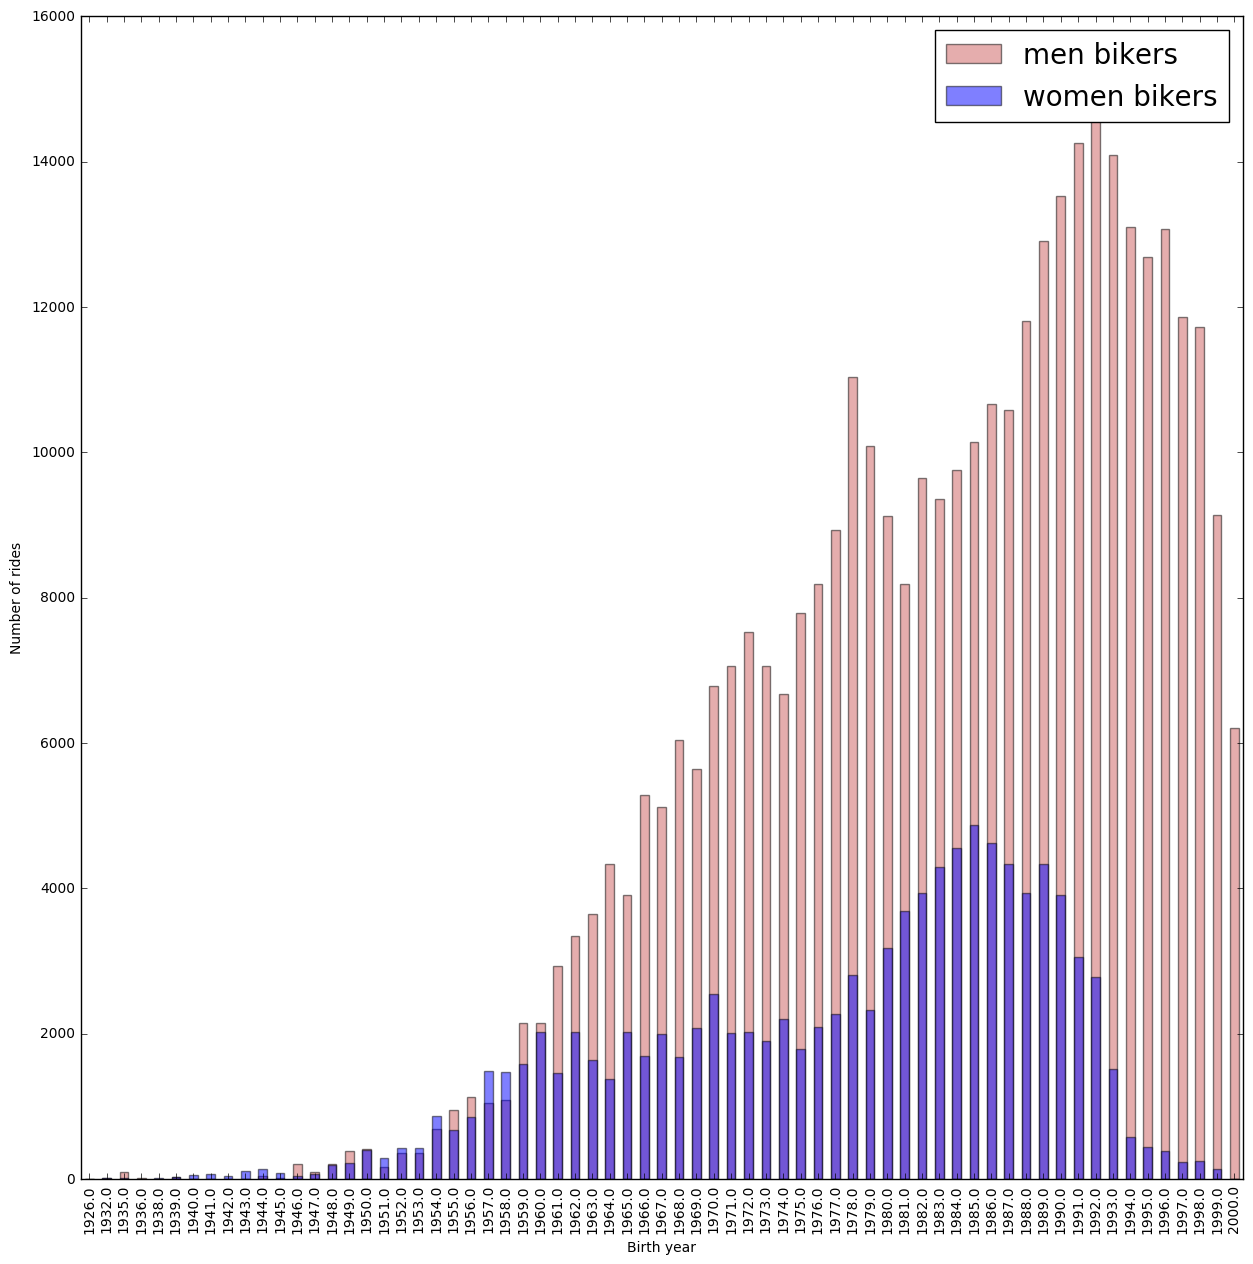

In [20]:
fig=pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
 
ax =(male['birth year']).plot(kind="bar",color='IndianRed',  alpha=0.5)
(female['birth year']).plot(kind="bar" ,     alpha=0.5)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Birth year")
pl.legend(['men bikers','women bikers'],fontsize=20)

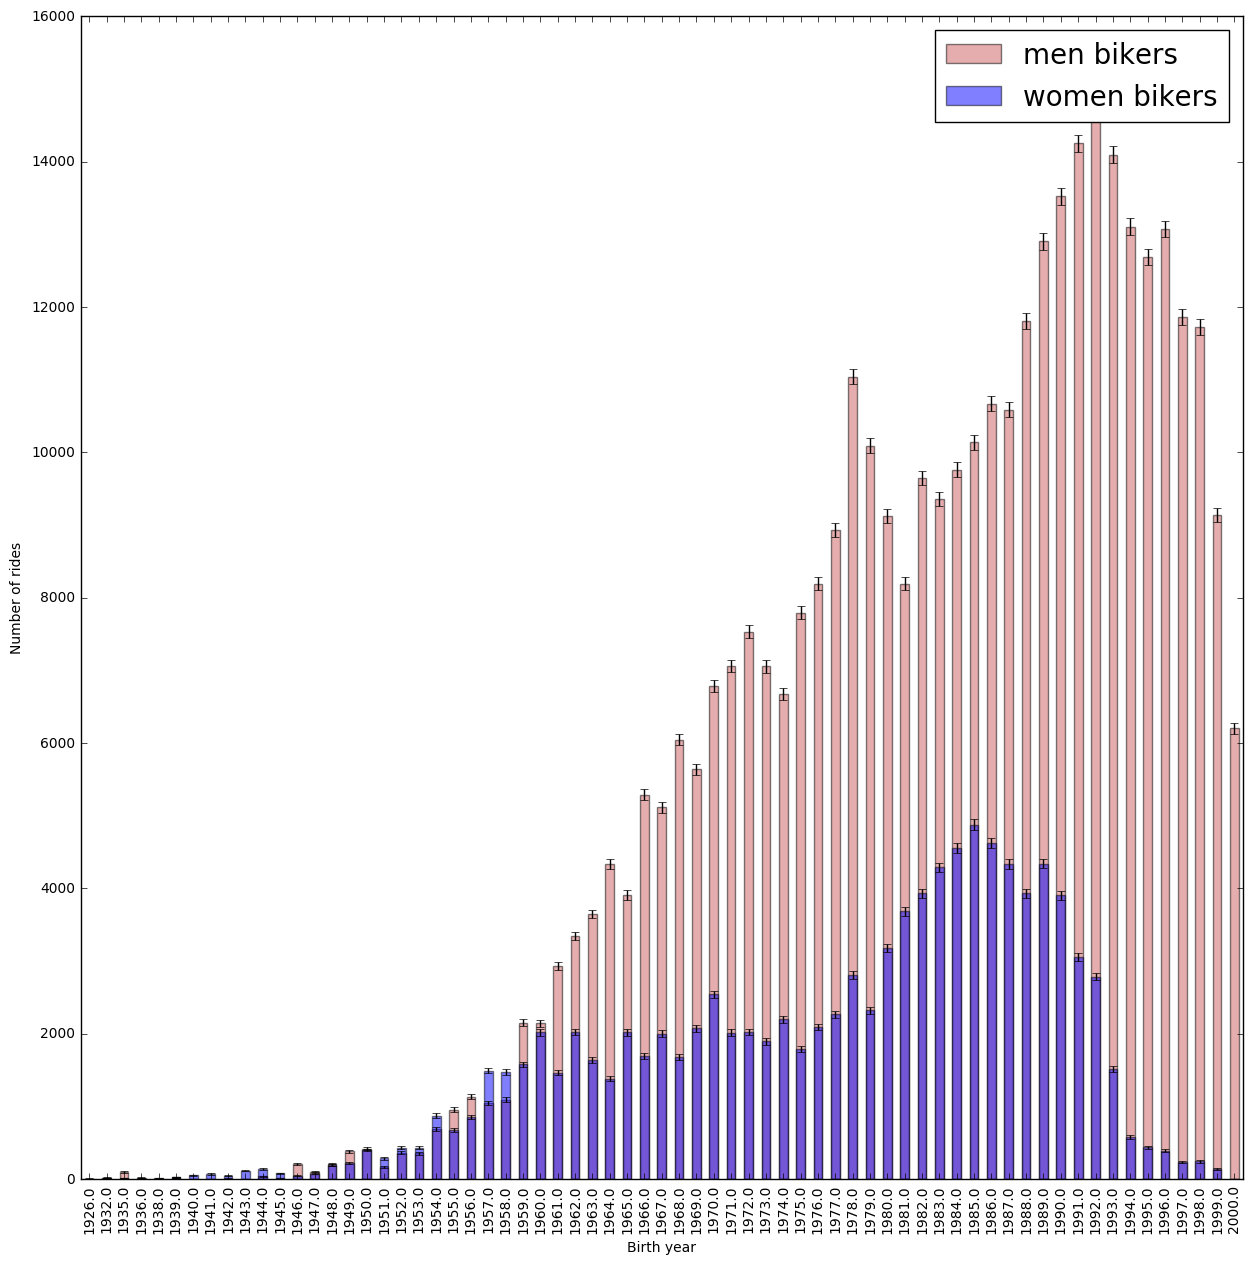

In [21]:
fig=pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_m = 1
error_m = np.sqrt(male['birth year'])
ax =(male['birth year']).plot(kind="bar",color='IndianRed',yerr=[ ((error_m) / norm_m, (error_m) / norm_m)],  alpha=0.5)
norm_w = 1
error_w = np.sqrt(female['birth year'])
(female['birth year']).plot(kind="bar" ,yerr=[ ((error_w) / norm_w, (error_w) / norm_w)],    alpha=0.5)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Birth year")
pl.legend(['men bikers ','women bikers'],fontsize=20)

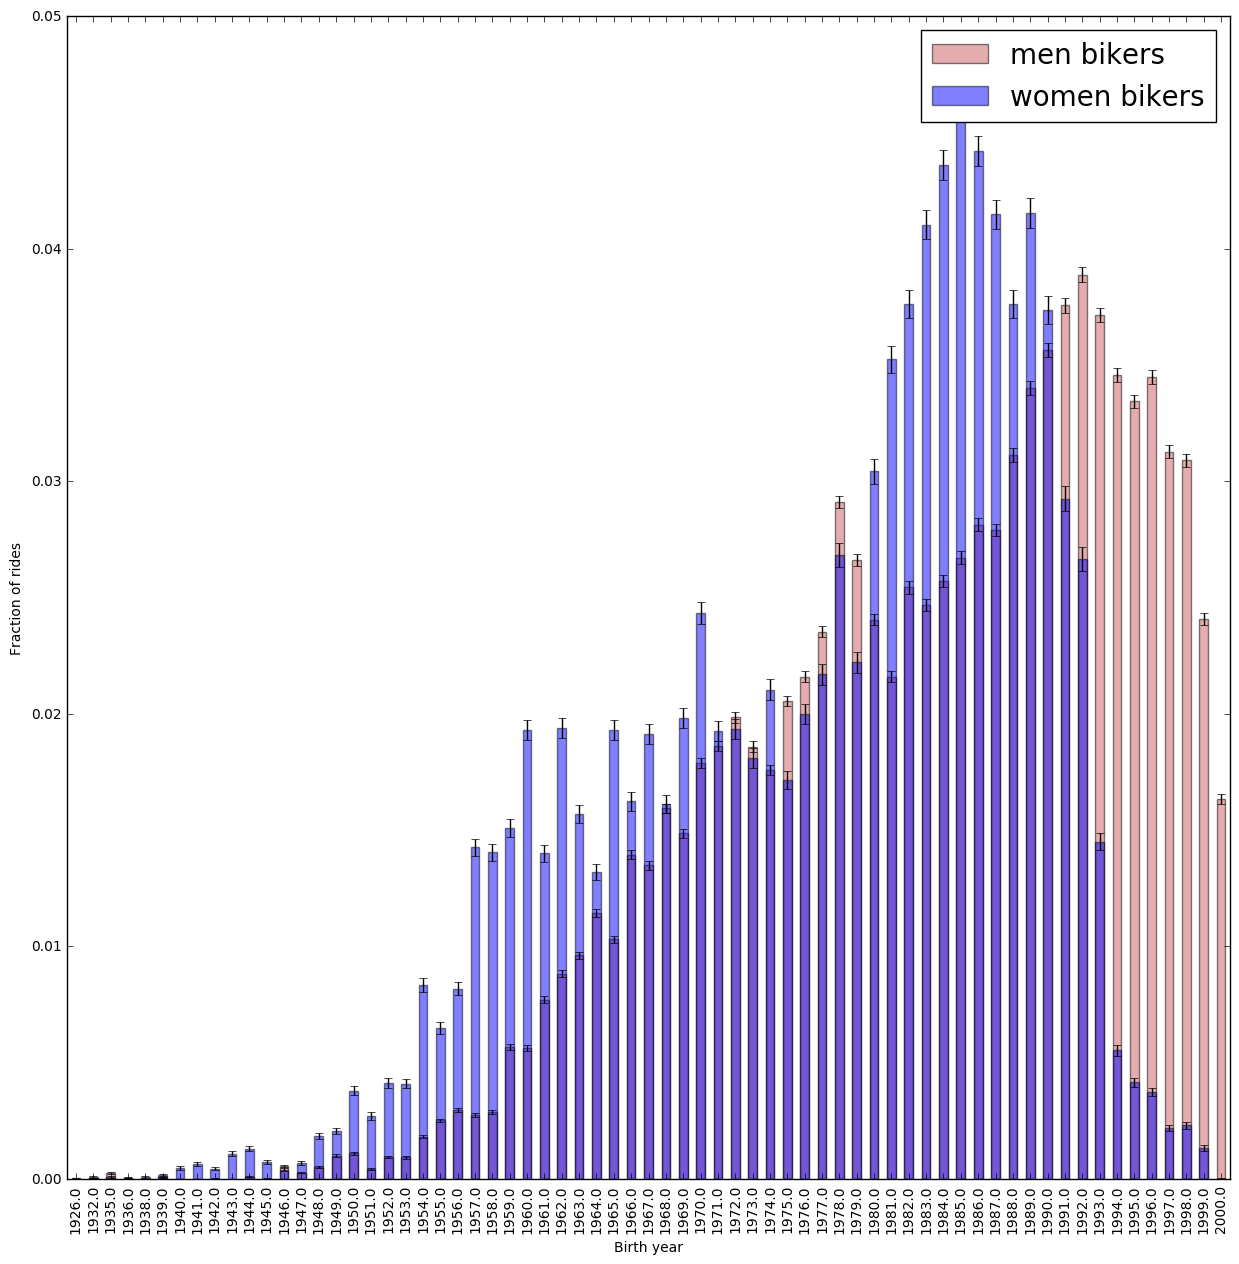

In [22]:


#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_m = male['birth year'].sum()
error_m = np.sqrt(male['birth year'])
ax =(male['birth year']/ norm_m).plot(kind="bar",color='IndianRed',yerr=[ ((error_m) / norm_m, (error_m) / norm_m)],  alpha=0.5)
norm_w = female['birth year'].sum()
error_w = np.sqrt(female['birth year'])
(female['birth year']/ norm_w).plot(kind="bar" ,yerr=[ ((error_w) / norm_w, (error_w) / norm_w)],    alpha=0.5)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Birth year")
pl.legend(['men bikers ','women bikers'],fontsize=20)

Men: old:0.933, young:0.066, young error:0.002, young error:0.066
Women: old:0.910, young:0.090, young error:0.003, young error:0.090


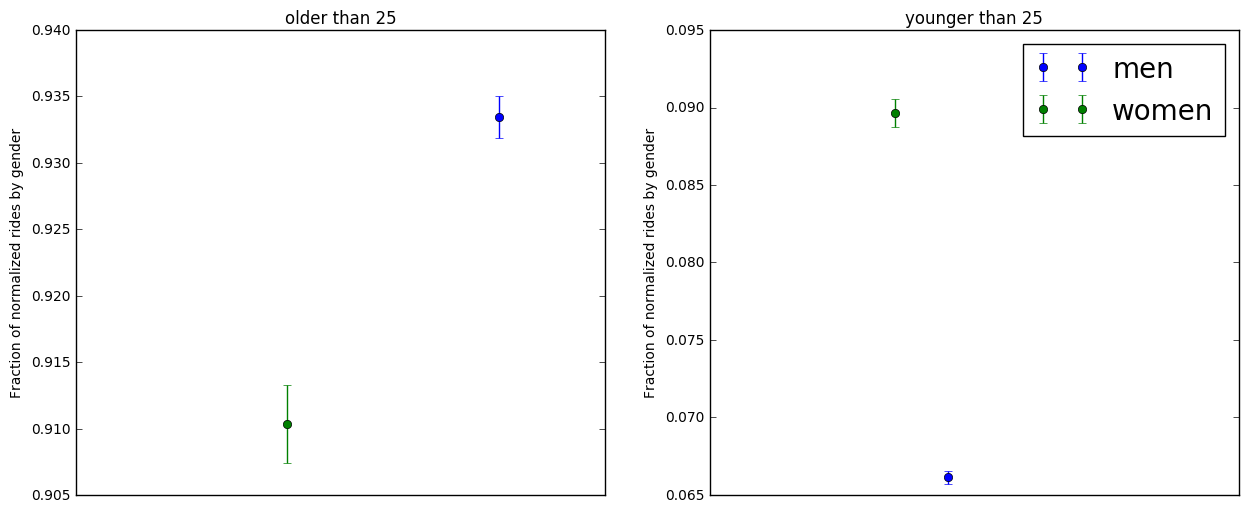

In [17]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
old_w = sum(female['birth year'][1926:1990]) * 1.0 / norm_w
young_w = sum(female['birth year'][1991:2000]) * 1.0 / norm_w
eold_w = np.sqrt(sum(error_w[1926:1990]**2)) / norm_w
eyoung_w = np.sqrt(sum(error_w[1991:2000]**2)) / norm_w

old_m = sum(male['birth year'][1926:1990]) * 1.0 / norm_m
young_m = sum(male['birth year'][1991:2000]) * 1.0 / norm_m
eold_m = np.sqrt(sum(error_m[1926:1990]**2)) / norm_m
eyoung_m = np.sqrt(sum(error_m[1991:2000]**2)) / norm_m

print("Men: old:{0:.3f}, young:{1:.3f}, young error:{2:.3f}, young error:{3:.3f}"\
      .format(old_m, young_m, eold_m, young_m))
print("Women: old:{0:.3f}, young:{1:.3f}, young error:{2:.3f}, young error:{3:.3f}"\
      .format(old_w, young_w, eold_w, young_w))

ax1.errorbar([0.4], [old_m], yerr=[eold_m], fmt='o', label='men')
ax1.errorbar([0.2], [old_w], yerr=[eold_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [young_m], yerr=[eyoung_m], fmt='o', label='men')
ax2.errorbar([0.2], [young_w], yerr=[eyoung_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("older than 25")
ax2.set_title("younger than 25")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)